# Lending Club - Loan Approval Process Optimization

# 1. Data Wrangling

## 1.1 Imports

In [1]:
# Import the libraries necessary for the current task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# pandas Configuration
pd.set_option("max_rows", 120)
pd.set_option("max_columns", 120)
pd.set_option("display.max_colwidth", None)

## 1.2 Data

__Data Source: https://data.world/jaypeedevlin/lending-club-loan-data-2007-11__

In [2]:
# Load the CSV data and the data dictionary
LC_data = pd.read_csv(r"C:\Users\lastr\Desktop\GitHub\Lending_Club_Capstone\raw_data\lending_club_loans.csv",
                skiprows=1, low_memory=False)
data_dictionary = pd.read_csv(r"C:\Users\lastr\Desktop\GitHub\Lending_Club_Capstone\raw_data\LCDataDictionary.csv")

In [3]:
# Summary of the data
LC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


## 1.3 Data Exploration

### 1.3.1 Missing Values by Feature

In [4]:
# Number of missing values in each feature
missing = pd.concat([LC_data.isnull().sum(), 100 * LC_data.isnull().mean()], axis=1)
missing.columns = ["Count", "%"]
missing.sort_values(by=["Count", "%"])

Count           %
id                                  0    0.000000
member_id                           3    0.007053
loan_amnt                           3    0.007053
funded_amnt                         3    0.007053
funded_amnt_inv                     3    0.007053
term                                3    0.007053
int_rate                            3    0.007053
installment                         3    0.007053
grade                               3    0.007053
sub_grade                           3    0.007053
home_ownership                      3    0.007053
verification_status                 3    0.007053
issue_d                             3    0.007053
loan_status                         3    0.007053
pymnt_plan                          3    0.007053
url                                 3    0.007053
purpose                             3    0.007053
zip_code                            3    0.007053
addr_state                          3    0.007053
dti                                 3    0.007053
fico_range_low                      3    0.007053
fico_range_high                     3    0.007053
revol_bal                           3    0.007053
initial_list_status                 3    0.007053
out_prncp                           3    0.007053
out_prncp_inv                       3    0.007053
total_pymnt                         3    0.007053
total_pymnt_inv                     3    0.007053
total_rec_prncp                     3    0.007053
total_rec_int                       3    0.007053
total_rec_late_fee                  3    0.007053
recoveries                          3    0.007053
collection_recovery_fee             3    0.007053
last_pymnt_amnt                     3    0.007053
last_fico_range_high                3    0.007053
last_fico_range_low                 3    0.007053
policy_code                         3    0.007053
application_type                    3    0.007053
annual_inc                          7    0.016456
last_credit_pull_d                  7    0.016456
title                              16    0.037613
delinq_2yrs                        32    0.075227
earliest_cr_line                   32    0.075227
inq_last_6mths                     32    0.075227
open_acc                           32    0.075227
pub_rec                            32    0.075227
total_acc                          32    0.075227
acc_now_delinq                     32    0.075227
delinq_amnt                        32    0.075227
last_pymnt_d                       86    0.202172
revol_util                         93    0.218628
tax_liens                         108    0.253891
collections_12_mths_ex_med        148    0.347924
chargeoff_within_12_mths          148    0.347924
emp_length                       1115    2.621186
pub_rec_bankruptcies             1368    3.215948
emp_title                        2629    6.180356
desc                            13296   31.256759
mths_since_last_delinq          26929   63.305750
mths_since_last_record          38887   91.417086
next_pymnt_d                    39242   92.251634
mths_since_last_major_derog     42538  100.000000
annual_inc_joint                42538  100.000000
dti_joint                       42538  100.000000
verification_status_joint       42538  100.000000
tot_coll_amt                    42538  100.000000
tot_cur_bal                     42538  100.000000
open_acc_6m                     42538  100.000000
open_il_6m                      42538  100.000000
open_il_12m                     42538  100.000000
open_il_24m                     42538  100.000000
mths_since_rcnt_il              42538  100.000000
total_bal_il                    42538  100.000000
il_util                         42538  100.000000
open_rv_12m                     42538  100.000000
open_rv_24m                     42538  100.000000
max_bal_bc                      42538  100.000000
all_util                        42538  100.000000
total_rev_hi_lim                42538  100.000000
inq_fi                          

In [5]:
# Features with 100 % missing values
missing[missing["%"]==100]

Count      %
mths_since_last_major_derog     42538  100.0
annual_inc_joint                42538  100.0
dti_joint                       42538  100.0
verification_status_joint       42538  100.0
tot_coll_amt                    42538  100.0
tot_cur_bal                     42538  100.0
open_acc_6m                     42538  100.0
open_il_6m                      42538  100.0
open_il_12m                     42538  100.0
open_il_24m                     42538  100.0
mths_since_rcnt_il              42538  100.0
total_bal_il                    42538  100.0
il_util                         42538  100.0
open_rv_12m                     42538  100.0
open_rv_24m                     42538  100.0
max_bal_bc                      42538  100.0
all_util                        42538  100.0
total_rev_hi_lim                42538  100.0
inq_fi                          42538  100.0
total_cu_tl                     42538  100.0
inq_last_12m                    42538  100.0
acc_open_past_24mths            42538  100.0
avg_cur_bal                     42538  100.0
bc_open_to_buy                  42538  100.0
bc_util                         42538  100.0
mo_sin_old_il_acct              42538  100.0
mo_sin_old_rev_tl_op            42538  100.0
mo_sin_rcnt_rev_tl_op           42538  100.0
mo_sin_rcnt_tl                  42538  100.0
mort_acc                        42538  100.0
mths_since_recent_bc            42538  100.0
mths_since_recent_bc_dlq        42538  100.0
mths_since_recent_inq           42538  100.0
mths_since_recent_revol_delinq  42538  100.0
num_accts_ever_120_pd           42538  100.0
num_actv_bc_tl                  42538  100.0
num_actv_rev_tl                 42538  100.0
num_bc_sats                     42538  100.0
num_bc_tl                       42538  100.0
num_il_tl                       42538  100.0
num_op_rev_tl                   42538  100.0
num_rev_accts                   42538  100.0
num_rev_tl_bal_gt_0             42538  100.0
num_sats                        42538  100.0
num_tl_120dpd_2m                42538  100.0
num_tl_30dpd                    42538  100.0
num_tl_90g_dpd_24m              42538  100.0
num_tl_op_past_12m              42538  100.0
pct_tl_nvr_dlq                  42538  100.0
percent_bc_gt_75                42538  100.0
tot_hi_cred_lim                 42538  100.0
total_bal_ex_mort               42538  100.0
total_bc_limit                  42538  100.0
total_il_high_credit_limit      42538  100.0

In [6]:
# Remove all columns with 100 % missing values (include columns with at least 1 non-NA value)
threshold = 1
LC_data = LC_data.dropna(thresh=threshold, axis=1)

In [7]:
# Call the head method to display first three entries of the data
LC_data.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status   issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-2011   Fully Paid          n   
1     30000.0     Source Verified  Dec-2011  Charged Off          n   
2     12252.0        Not Verified  Dec-2011   Fully Paid          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             NaN   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0         Jan-1985           735.0            739.0   
1 

### 1.3.2 Preliminary Feature Selection

#### 1.3.2.1 Initial Column Drop

In [8]:
# Drop columns which are obviously not useful: url, desc
LC_data = LC_data.drop(["url", "desc"], axis=1)

In [9]:
# View the number of entries and features after the initial column drop
LC_data.shape

(42538, 59)

#### 1.3.2.2 Feature Evaluation Using a New Reference Data Frame

In [10]:
# Look at the data dictionary
data_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [11]:
# Rename the data dictionary column for convenience 
data_dictionary = data_dictionary.rename(columns={"LoanStatNew": "features", "Description": "description"})

In [12]:
# Create an overview dataframe using the data dictionary
LC_data_dtypes = pd.DataFrame(LC_data.dtypes, columns=["dtypes"])
LC_data_dtypes = LC_data_dtypes.reset_index()
LC_data_dtypes = LC_data_dtypes.rename(columns={"index": "features"})
data_overview = LC_data_dtypes.merge(data_dictionary, on="features", how="left")

In [13]:
# Call the head method to display first five entries of data_overview
data_overview.head()

features   dtypes  \
0               id   object   
1        member_id  float64   
2        loan_amnt  float64   
3      funded_amnt  float64   
4  funded_amnt_inv  float64   

                                                                                                                                                                    description  
0                                                                                                                                 A unique LC assigned ID for the loan listing.  
1                                                                                                                              A unique LC assigned Id for the borrower member.  
2  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  
3                                                                                                                The total amount committed to that loan at that point in time.  
4                                                                                                  The total amount committed by investors for that loan at that point in time.

__Qualities to consider:__
- Redundancy
- Relevance
- Data leakage
- Usefulness

In [14]:
# Examine the features and remove features based on the aforementioned qualities starting with first 20 entries
data_overview[:20]

features   dtypes  \
0                    id   object   
1             member_id  float64   
2             loan_amnt  float64   
3           funded_amnt  float64   
4       funded_amnt_inv  float64   
5                  term   object   
6              int_rate   object   
7           installment  float64   
8                 grade   object   
9             sub_grade   object   
10            emp_title   object   
11           emp_length   object   
12       home_ownership   object   
13           annual_inc  float64   
14  verification_status   object   
15              issue_d   object   
16          loan_status   object   
17           pymnt_plan   object   
18              purpose   object   
19                title   object   

                                                                                                                                                                     description  
0                                                                                                                                  A unique LC assigned ID for the loan listing.  
1                                                                                                                               A unique LC assigned Id for the borrower member.  
2   The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  
3                                                                                                                 The total amount committed to that loan at that point in time.  
4                                                                                                   The total amount committed by investors for that loan at that point in time.  
5                                                                                           The number of payments on the loan. Values are in months and can be either 36 or 60.  
6                                                                                                                                                      Interest Rate on the loan  
7                                                                                                               The monthly payment owed by the borrower if the loan originates.  
8                                                                                                                                                         LC assigned loan grade  
9                                                                                                                                                      LC assigned loan subgrade  
10                                                                                                           The job title supplied by the Borrower when applying for the loan.*  
11                                            Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.   
12                                                           The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  
13                                                                                                 The self-reported annual income provided by the borrower during registration.  
14                                                                                    Indicates if income was verified by LC, not verified, or if the income source was verified  
15                                                                                                                                           The month which the loan was funded  
16                                                                                                                                                    Current status of the loan  
17                                  

In [15]:
# Check for duplication in id
LC_data["id"].nunique() == len(LC_data)

True

In [16]:
# Check whether there is any member with multiple loans
LC_data["member_id"].nunique() == len(LC_data)

False

In [17]:
# Identify the member(s) with multiple loans
member_id = LC_data["member_id"]
LC_data[member_id.isin(member_id[member_id.duplicated()])]

id  member_id  loan_amnt  \
39786         Loans that do not meet the credit policy        NaN        NaN   
42536  Total amount funded in policy code 1: 460296150        NaN        NaN   
42537          Total amount funded in policy code 2: 0        NaN        NaN   

       funded_amnt  funded_amnt_inv term int_rate  installment grade  \
39786          NaN              NaN  NaN      NaN          NaN   NaN   
42536          NaN              NaN  NaN      NaN          NaN   NaN   
42537          NaN              NaN  NaN      NaN          NaN   NaN   

      sub_grade emp_title emp_length home_ownership  annual_inc  \
39786       NaN       NaN        NaN            NaN         NaN   
42536       NaN       NaN        NaN            NaN         NaN   
42537       NaN       NaN        NaN            NaN         NaN   

      verification_status issue_d loan_status pymnt_plan purpose title  \
39786                 NaN     NaN         NaN        NaN     NaN   NaN   
42536                 NaN     NaN         NaN        NaN     NaN   NaN   
42537                 NaN     NaN         NaN        NaN     NaN   NaN   

      zip_code addr_state  dti  delinq_2yrs earliest_cr_line  fico_range_low  \
39786      NaN        NaN  NaN          NaN              NaN             NaN   
42536      NaN        NaN  NaN          NaN              NaN             NaN   
42537      NaN        NaN  NaN          NaN              NaN             NaN   

       fico_range_high  inq_last_6mths  mths_since_last_delinq  \
39786              NaN             NaN                     NaN   
42536              NaN             NaN                     NaN   
42537              NaN             NaN                     NaN   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39786                     NaN       NaN      NaN        NaN        NaN   
42536                     NaN       NaN      NaN        NaN        NaN   
42537                     NaN       NaN      NaN        NaN        NaN   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39786        NaN                 NaN        NaN            NaN          NaN   
42536        NaN                 NaN        NaN            NaN          NaN   
42537        NaN                 NaN        NaN            NaN          NaN   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
39786              NaN              NaN            NaN                 NaN   
42536              NaN              NaN            NaN                 NaN   
42537              NaN              NaN            NaN                 NaN   

       recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
39786         NaN                      NaN          NaN              NaN   
42536         NaN                      NaN          NaN              NaN   
42537         NaN                      NaN          NaN              NaN   

      next_pymnt_d last_credit_pull_d  last_fico_range_high  \
39786          NaN                NaN                   NaN   
42536          NaN                NaN                   NaN   
42537          NaN                NaN                   NaN   

       last_fico_range_low  collections_12_mths_ex_med  policy_code  \
39786                  NaN                         NaN          NaN   
42536                  NaN                         NaN          NaN   
42537                  NaN                         NaN          NaN   

      application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
39786              NaN             NaN                       NaN          NaN   
42536              NaN             NaN                       NaN          NaN   
42537              NaN             NaN                       NaN          NaN   

       pub_rec_bankruptcies  tax_liens  
39786                   NaN        NaN  
42536                   NaN        NaN  
42537                   NaN        NaN

In [18]:
# Verify whether the three entries above are the only entries with null value member_id
LC_data[LC_data["member_id"].isnull()]

id  member_id  loan_amnt  \
39786         Loans that do not meet the credit policy        NaN        NaN   
42536  Total amount funded in policy code 1: 460296150        NaN        NaN   
42537          Total amount funded in policy code 2: 0        NaN        NaN   

       funded_amnt  funded_amnt_inv term int_rate  installment grade  \
39786          NaN              NaN  NaN      NaN          NaN   NaN   
42536          NaN              NaN  NaN      NaN          NaN   NaN   
42537          NaN              NaN  NaN      NaN          NaN   NaN   

      sub_grade emp_title emp_length home_ownership  annual_inc  \
39786       NaN       NaN        NaN            NaN         NaN   
42536       NaN       NaN        NaN            NaN         NaN   
42537       NaN       NaN        NaN            NaN         NaN   

      verification_status issue_d loan_status pymnt_plan purpose title  \
39786                 NaN     NaN         NaN        NaN     NaN   NaN   
42536                 NaN     NaN         NaN        NaN     NaN   NaN   
42537                 NaN     NaN         NaN        NaN     NaN   NaN   

      zip_code addr_state  dti  delinq_2yrs earliest_cr_line  fico_range_low  \
39786      NaN        NaN  NaN          NaN              NaN             NaN   
42536      NaN        NaN  NaN          NaN              NaN             NaN   
42537      NaN        NaN  NaN          NaN              NaN             NaN   

       fico_range_high  inq_last_6mths  mths_since_last_delinq  \
39786              NaN             NaN                     NaN   
42536              NaN             NaN                     NaN   
42537              NaN             NaN                     NaN   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39786                     NaN       NaN      NaN        NaN        NaN   
42536                     NaN       NaN      NaN        NaN        NaN   
42537                     NaN       NaN      NaN        NaN        NaN   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39786        NaN                 NaN        NaN            NaN          NaN   
42536        NaN                 NaN        NaN            NaN          NaN   
42537        NaN                 NaN        NaN            NaN          NaN   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
39786              NaN              NaN            NaN                 NaN   
42536              NaN              NaN            NaN                 NaN   
42537              NaN              NaN            NaN                 NaN   

       recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
39786         NaN                      NaN          NaN              NaN   
42536         NaN                      NaN          NaN              NaN   
42537         NaN                      NaN          NaN              NaN   

      next_pymnt_d last_credit_pull_d  last_fico_range_high  \
39786          NaN                NaN                   NaN   
42536          NaN                NaN                   NaN   
42537          NaN                NaN                   NaN   

       last_fico_range_low  collections_12_mths_ex_med  policy_code  \
39786                  NaN                         NaN          NaN   
42536                  NaN                         NaN          NaN   
42537                  NaN                         NaN          NaN   

      application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
39786              NaN             NaN                       NaN          NaN   
42536              NaN             NaN                       NaN          NaN   
42537              NaN             NaN                       NaN          NaN   

       pub_rec_bankruptcies  tax_liens  
39786                   NaN        NaN  
42536                   NaN        NaN  
42537                   NaN        NaN

In [19]:
# Remove the three entries
LC_data = LC_data.dropna(subset=["member_id"])

__Features to be removed:__
* __id/member_id__ - variables used for identification purposes only
* __funded_amnt/funded_amnt/funded_amnt_inv/issue_d__ - data leakage from future
* __int_rate/sub_grade__ - redundant information which is contained in __grade__
* __emp_title__ - not useful by itself

In [20]:
# Remove the features mentioned above.
drop_list = ["id", "member_id", "funded_amnt", "funded_amnt_inv", "int_rate", "sub_grade", "emp_title", "issue_d"]
LC_data = LC_data.drop(drop_list, axis=1)

In [21]:
# Examine the next 20 features
data_overview[20:40]

features   dtypes  \
20                zip_code   object   
21              addr_state   object   
22                     dti  float64   
23             delinq_2yrs  float64   
24        earliest_cr_line   object   
25          fico_range_low  float64   
26         fico_range_high  float64   
27          inq_last_6mths  float64   
28  mths_since_last_delinq  float64   
29  mths_since_last_record  float64   
30                open_acc  float64   
31                 pub_rec  float64   
32               revol_bal  float64   
33              revol_util   object   
34               total_acc  float64   
35     initial_list_status   object   
36               out_prncp  float64   
37           out_prncp_inv  float64   
38             total_pymnt  float64   
39         total_pymnt_inv  float64   

                                                                                                                                                                                                 description  
20                                                                                                                     The first 3 numbers of the zip code provided by the borrower in the loan application.  
21                                                                                                                                                The state provided by the borrower in the loan application  
22  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.  
23                                                                                              The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years  
24                                                                                                                                         The month the borrower's earliest reported credit line was opened  
25                                                                                                                              The lower boundary range the borrower’s FICO at loan origination belongs to.  
26                                                                                                                              The upper boundary range the borrower’s FICO at loan origination belongs to.  
27                                                                                                                          The number of inquiries in past 6 months (excluding auto and mortgage inquiries)  
28                                                                                                                                               The number of months since the borrower's last delinquency.  
29                                                                                                                                                        The number of months since the last public record.  
30                                                                                                                                            The number of open credit lines in the borrower's credit file.  
31                                                                                                                                                                       Number of derogatory public records  
32                                                                                                                                                                            Total credit revolving balance  
33                                                                                Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.  
34                                                                                           

__Features to be removed:__
* __zip_code__ - redundant information found in __addr_state__
* __out_prncp/out_prncp_inv/total_pymnt/total_pymnt_inv__ - data leakage from future

In [22]:
# Remove the features mentioned above.
drop_list = ["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv"]
LC_data = LC_data.drop(drop_list, axis=1)

In [23]:
# Examine the remaining features
data_overview[40:]

features   dtypes  \
40             total_rec_prncp  float64   
41               total_rec_int  float64   
42          total_rec_late_fee  float64   
43                  recoveries  float64   
44     collection_recovery_fee  float64   
45                last_pymnt_d   object   
46             last_pymnt_amnt  float64   
47                next_pymnt_d   object   
48          last_credit_pull_d   object   
49        last_fico_range_high  float64   
50         last_fico_range_low  float64   
51  collections_12_mths_ex_med  float64   
52                 policy_code  float64   
53            application_type   object   
54              acc_now_delinq  float64   
55    chargeoff_within_12_mths  float64   
56                 delinq_amnt  float64   
57        pub_rec_bankruptcies  float64   
58                   tax_liens  float64   

                                                                                             description  
40                                                                            Principal received to date  
41                                                                             Interest received to date  
42                                                                            Late fees received to date  
43                                                                        post charge off gross recovery  
44                                                                        post charge off collection fee  
45                                                                       Last month payment was received  
46                                                                    Last total payment amount received  
47                                                                           Next scheduled payment date  
48                                                  The most recent month LC pulled credit for this loan  
49                                  The upper boundary range the borrower’s last FICO pulled belongs to.  
50                                  The lower boundary range the borrower’s last FICO pulled belongs to.  
51                                      Number of collections in 12 months excluding medical collections  
52                   publicly available policy_code=1\nnew products not publicly available policy_code=2  
53  Indicates whether the loan is an individual application or a joint application with two co-borrowers  
54                                       The number of accounts on which the borrower is now delinquent.  
55                                                                Number of charge-offs within 12 months  
56                    The past-due amount owed for the accounts on which the borrower is now delinquent.  
57                                                                  Number of public record bankruptcies  
58                                                                                   Number of tax liens

__Features to be removed:__
* __total_rec_prncp/total_rec_int/total_rec_late_fee/recoveries__ - data leakage from future
* __collection_recovery_fee/last_pymnt_d/last_pymnt_amnt/next_pymnt_d__ - same as above

In [24]:
# Remove the features mentioned
drop_list = ["total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries",
             "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d"]
LC_data = LC_data.drop(drop_list, axis=1)

### 1.3.3 Investigation on FICO Score

#### 1.3.3.1 FICO Score Ranges Initially Given

In [25]:
# Examine FICO score columns, check for null values
print(LC_data["fico_range_low"].unique())
print(LC_data["fico_range_high"].unique())

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625. 650. 655. 645. 640. 635. 610.
 620. 615.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629. 654. 659. 649. 644. 639. 614.
 624. 619.]


Text(0, 0.5, 'Frequency')

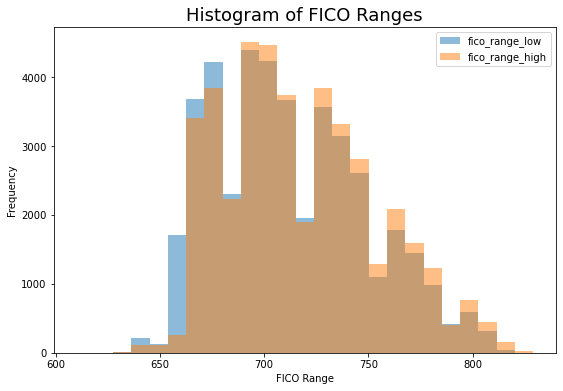

In [26]:
fico_cols = ["fico_range_low", "fico_range_high"]

LC_data[fico_cols].plot.hist(alpha=0.5, bins=25, figsize=[9,6])
plt.title("Histogram of FICO Ranges", fontsize=18)
plt.xlabel("FICO Range")
plt.ylabel("Frequency")

#### 1.3.3.2 Average FICO Range as a New Feature

In [27]:
# Calculate the average FICO range for each entry
LC_data["fico_range_avg"] = (LC_data["fico_range_low"] + LC_data["fico_range_high"]) / 2

In [28]:
# Check the FICO columns again
fico_cols.append("fico_range_avg")
LC_data[fico_cols]

fico_range_low  fico_range_high  fico_range_avg
0               735.0            739.0           737.0
1               740.0            744.0           742.0
2               735.0            739.0           737.0
3               690.0            694.0           692.0
4               695.0            699.0           697.0
...               ...              ...             ...
42531           685.0            689.0           687.0
42532           695.0            699.0           697.0
42533           710.0            714.0           712.0
42534           740.0            744.0           742.0
42535           770.0            774.0           772.0

[42535 rows x 3 columns]

__Features to be removed:__
- __fico_range_low/fico_range_high__ - redundant information found in __fico_range_avg__
- __last_fico_range_low/last_fico_range_high__ - data leakage from future

In [29]:
# Remove unnecessary FICO columns: fico_range_low, fico_range_high, last_fico_range_low, last_fico_range_high
drop_list = ["fico_range_low", "fico_range_high", "last_fico_range_low", "last_fico_range_high"]
LC_data = LC_data.drop(drop_list, axis=1)

## 1.4 Target Feature for the Prediction Model

In [30]:
# Select target feature for the prediction model
data_overview[data_overview["features"]=="loan_status"]

features  dtypes                 description
16  loan_status  object  Current status of the loan

In [31]:
# Examine the values in loan_status
LC_data["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

### 1.4.1 Binary Classification for the Target Feature

__Values of interest:__
- __Fully Paid__
- __Charged Off__
- __Does not meet the credit policy. Status:Fully Paid__
- __Does not meet the credit policy. Status:Charged Off__

__New classification:__
- __Good Loan__ for __Fully Paid__
- __Bad Loan__ for the remaining three values of interest

Any loan status which is ongoing/in-progress will not be accounted.

In [32]:
# Rename the loan_status to loan_type
LC_data.rename(columns={"loan_status": "loan_type"}, inplace=True)

# Create a new classification for the loan_type: Good Loan, Bad Loan
LC_data["loan_type"] = LC_data["loan_type"].str.replace("Fully Paid", "Good Loan")
LC_data["loan_type"] = LC_data["loan_type"].str.replace("Charged Off", "Bad Loan")
LC_data["loan_type"] = LC_data["loan_type"].str.replace(
    "Does not meet the credit policy. Status:Fully Paid", "Bad Loan")
LC_data["loan_type"] = LC_data["loan_type"].str.replace(
    "Does not meet the credit policy. Status:Charged Off", "Bad Loan")
LC_data = LC_data[(LC_data["loan_type"]=="Good Loan") | (LC_data["loan_type"]=="Bad Loan")]

# Convert the new classification into a binary classification
binary_clf = {"loan_type": {"Good Loan": 1, "Bad Loan": 0}}
LC_data = LC_data.replace(binary_clf)

### 1.4.2 Visualization of the Target Feature

Text(0.5, 1.0, 'Percentage of Each Loan Type')

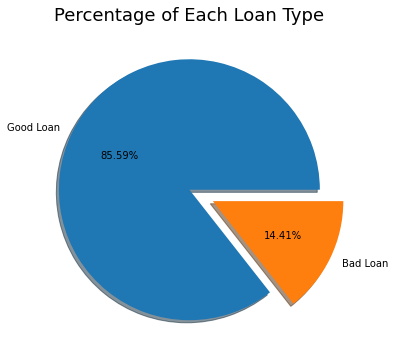

In [33]:
# Visualize the result
Loan_Type = [LC_data["loan_type"].value_counts()[1], LC_data["loan_type"].value_counts()[0]]
explode = (0, 0.2)
labels = ["Good Loan", "Bad Loan"]

plt.rcParams["figure.figsize"] = [9,6]
plt.pie(Loan_Type, autopct="%1.2f%%", explode=explode, shadow=True, labels=labels)
plt.title("Percentage of Each Loan Type", fontsize=18)

## 1.5 Further Reduction of Features

Columns containing only one unique value do not provide any information, and thus they will be removed.

In [34]:
# Remove columns with only one unique value
LC_data = LC_data.loc[:, LC_data.nunique()!=1]

In [35]:
# Check for the frequency of unique values in columns with less than 5 unique values
for col in LC_data.columns:
    if LC_data[col].nunique() < 5:
        print(LC_data[col].value_counts())
        print()

 36 months    29096
 60 months    10143
Name: term, dtype: int64

Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64

1    33586
0     5653
Name: loan_type, dtype: int64

n    39238
y        1
Name: pymnt_plan, dtype: int64

0.0    36872
1.0     1665
2.0        5
Name: pub_rec_bankruptcies, dtype: int64



__pymnt_plan__ column contains only 1 __y__ and the remaining values are __n__.

This column does not yield any useful information.

In [36]:
# Remove pymnt_plan column
LC_data = LC_data.drop(["pymnt_plan"], axis=1)

In [37]:
# Summary of the processed data
LC_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39239 entries, 0 to 39785
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39239 non-null  float64
 1   term                    39239 non-null  object 
 2   installment             39239 non-null  float64
 3   grade                   39239 non-null  object 
 4   emp_length              38182 non-null  object 
 5   home_ownership          39239 non-null  object 
 6   annual_inc              39239 non-null  float64
 7   verification_status     39239 non-null  object 
 8   loan_type               39239 non-null  int64  
 9   purpose                 39239 non-null  object 
 10  title                   39228 non-null  object 
 11  addr_state              39239 non-null  object 
 12  dti                     39239 non-null  float64
 13  delinq_2yrs             39239 non-null  float64
 14  earliest_cr_line        39239 non-null

## 1.6 Save Data

In [38]:
data_path = r"C:\Users\lastr\Desktop\GitHub\Lending_Club_Capstone\data"

if not os.path.exists(data_path):
    os.mkdir(data_path)

In [39]:
data_path_lending_club_loans = os.path.join(data_path, "lending_club_loans_cleaned.csv")

if not os.path.exists(data_path_lending_club_loans):
    LC_data.to_csv(data_path_lending_club_loans, index=False)